In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
import seaborn as sns
import os
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold
print(os.getcwd())

C:\Users\Suprita Ganesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


C:\Users\Suprita Ganesh\Desktop\ML3


In [2]:
 oaklandData= pd.read_csv("five-year-financial-forecast-2016-2020.csv")## Oakland's data set
oaklandData.head()

,Account Type,Department,Org - Desc,Org No.,Fund - Desc,Fund Group,Fund Group - Ordered,Fund No.,Fund Name,Project - Desc,...,FY15-16,FY16-17,FY17-18,FY18-19,FY19-20,FY15-16 OPEB,FY16-17 OPEB,FY17-18 OPEB,FY18-19 OPEB,FY19-20 OPEB
0,Expense,City Administrator,02111 - City Administrator: Administration,2111,1010 - General Fund: General Purpose,General Purpose Fund,01 - General Purpose Fund,1010,General Fund: General Purpose,0000000 - UNDETERMINED PROJECT,...,95863.0,95863.0,98499.23,101207.96,103991.0,95863.0,95863.0,98499.0,101208.0,103991.0
1,Expense,Non-Departmental,90591 - City-Wide Activities,90591,1010 - General Fund: General Purpose,General Purpose Fund,01 - General Purpose Fund,1010,General Fund: General Purpose,0000000 - UNDETERMINED PROJECT,...,34960.0,35460.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,Expense,City Administrator,02111 - City Administrator: Administration,2111,1010 - General Fund: General Purpose,General Purpose Fund,01 - General Purpose Fund,1010,General Fund: General Purpose,0000000 - UNDETERMINED PROJECT,...,1442819.0,1442819.0,1482497.00,1523265.00,1565155.0,1442819.0,1442819.0,1482497.0,1523265.0,1565155.0
3,Expense,City Administrator,02111 - City Administrator: Administration,2111,1010 - General Fund: General Purpose,General Purpose Fund,01 - General Purpose Fund,1010,General Fund: General Purpose,0000000 - UNDETERMINED PROJECT,...,57636.0,57636.0,59221.00,60850.00,62523.0,57636.0,57636.0,59221.0,60850.0,62523.0
4,Expense,City Administrator,02111 - City Administrator: Administration,2111,1010 - General Fund: General Purpose,General Purpose Fund,01 - General Purpose Fund,1010,General Fund: General Purpose,A252110 - PUBLIC NUISANCE ORDINANCE PROGRAM,...,44932.0,44932.0,46168.00,47437.00,48742.0,44932.0,44932.0,46168.0,47437.0,48742.0


In [3]:
oaklandData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 29 columns):
Account Type            9607 non-null object
Department              9607 non-null object
Org - Desc              9607 non-null object
Org No.                 9607 non-null int64
Fund - Desc             9607 non-null object
Fund Group              9607 non-null object
Fund Group - Ordered    9607 non-null object
Fund No.                9607 non-null int64
Fund Name               9607 non-null object
Project - Desc          9607 non-null object
Project No.             9607 non-null object
Project Name            9607 non-null object
Program - Desc          9607 non-null object
Program No.             9607 non-null object
Program Name            9607 non-null object
Account - Desc          9606 non-null object
Account No.             9607 non-null int64
Account Name            9607 non-null object
Forecast Category       9607 non-null object
FY15-16                 9532 non-null flo

In [4]:
list(oaklandData)

['Account Type',
 'Department',
 'Org - Desc',
 'Org No.',
 'Fund - Desc',
 'Fund Group',
 'Fund Group - Ordered',
 'Fund No.',
 'Fund Name',
 'Project - Desc',
 'Project No.',
 'Project Name',
 'Program - Desc',
 'Program No.',
 'Program Name',
 'Account - Desc',
 'Account No.',
 'Account Name',
 'Forecast Category',
 'FY15-16',
 'FY16-17',
 'FY17-18',
 'FY18-19',
 'FY19-20',
 'FY15-16 OPEB',
 'FY16-17 OPEB',
 'FY17-18 OPEB',
 'FY18-19 OPEB',
 'FY19-20 OPEB']

In [5]:
oaklandData.drop(columns=['Project No.', 'Project Name', 'Account No.', 'Account - Desc', 'FY15-16 OPEB', 'FY16-17 OPEB','FY17-18 OPEB','FY18-19 OPEB','FY19-20 OPEB'], axis=1, inplace=True)


In [6]:
oaklandData.rename(columns={'Account Type':'AccType', 'Org - Desc':'OrgDesc', 'Org No.':'OrgNum', 'Fund - Desc':'FundDesc', 'Fund Group':'FundGrp', 'Fund Group - Ordered':'FundGrpOrd', 'Fund No.':'FundNum', 'Fund Name':'FundName', 'Project - Desc':'ProjectDesc', 'Program - Desc':'ProgramDesc', 'Program No.':'ProgramNo', 'Program Name':'ProgramName', 'Account Name':'AccName', 'Forecast Category':'ForecastCategory', 'FY15-16':'FY15_16', 'FY16-17':'FY16_17', 'FY17-18':'FY17_18', 'FY18-19':'FY18_19', 'FY19-20':'FY19_20'}, inplace=True)
oaklandData.head()

,AccType,Department,OrgDesc,OrgNum,FundDesc,FundGrp,FundGrpOrd,FundNum,FundName,ProjectDesc,ProgramDesc,ProgramNo,ProgramName,AccName,ForecastCategory,FY15_16,FY16_17,FY17_18,FY18_19,FY19_20
0,Expense,City Administrator,02111 - City Administrator: Administration,2111,1010 - General Fund: General Purpose,General Purpose Fund,01 - General Purpose Fund,1010,General Fund: General Purpose,0000000 - UNDETERMINED PROJECT,IP02 - OAKLAND ASSISTANCE CENTER,IP02,OAKLAND ASSISTANCE CENTER,Civilian: Regular,Civilian Salary & Overtime,95863.0,95863.0,98499.23,101207.96,103991.0
1,Expense,Non-Departmental,90591 - City-Wide Activities,90591,1010 - General Fund: General Purpose,General Purpose Fund,01 - General Purpose Fund,1010,General Fund: General Purpose,0000000 - UNDETERMINED PROJECT,IP59 - FINANCIAL MANAGEMENT,IP59,FINANCIAL MANAGEMENT,Contract Contingencies (Budgetary Only),Contract Services,34960.0,35460.0,0.00,0.00,0.0
2,Expense,City Administrator,02111 - City Administrator: Administration,2111,1010 - General Fund: General Purpose,General Purpose Fund,01 - General Purpose Fund,1010,General Fund: General Purpose,0000000 - UNDETERMINED PROJECT,IP03 - ADMINISTRATION,IP03,ADMINISTRATION,Civilian: Regular,Civilian Salary & Overtime,1442819.0,1442819.0,1482497.00,1523265.00,1565155.0
3,Expense,City Administrator,02111 - City Administrator: Administration,2111,1010 - General Fund: General Purpose,General Purpose Fund,01 - General Purpose Fund,1010,General Fund: General Purpose,0000000 - UNDETERMINED PROJECT,IP59 - FINANCIAL MANAGEMENT,IP59,FINANCIAL MANAGEMENT,Civilian: Regular,Civilian Salary & Overtime,57636.0,57636.0,59221.00,60850.00,62523.0
4,Expense,City Administrator,02111 - City Administrator: Administration,2111,1010 - General Fund: General Purpose,General Purpose Fund,01 - General Purpose Fund,1010,General Fund: General Purpose,A252110 - PUBLIC NUISANCE ORDINANCE PROGRAM,IP03 - ADMINISTRATION,IP03,ADMINISTRATION,Civilian: Regular,Civilian Salary & Overtime,44932.0,44932.0,46168.00,47437.00,48742.0


In [7]:
oaklandData.isnull().sum()


AccType               0
Department            0
OrgDesc               0
OrgNum                0
FundDesc              0
FundGrp               0
FundGrpOrd            0
FundNum               0
FundName              0
ProjectDesc           0
ProgramDesc           0
ProgramNo             0
ProgramName           0
AccName               0
ForecastCategory      0
FY15_16              75
FY16_17             104
FY17_18             105
FY18_19             105
FY19_20             105
dtype: int64

In [8]:
values = { 'FY15_16': oaklandData["FY15_16"].mean(), 'FY16_17': oaklandData["FY16_17"].mean(),'FY17_18': oaklandData["FY17_18"].mean(),'FY18_19': oaklandData["FY18_19"].mean(),'FY19_20': oaklandData["FY19_20"].mean()}
oaklandData.fillna(value=values, inplace=True)
oaklandData.isnull().sum()


AccType             0
Department          0
OrgDesc             0
OrgNum              0
FundDesc            0
FundGrp             0
FundGrpOrd          0
FundNum             0
FundName            0
ProjectDesc         0
ProgramDesc         0
ProgramNo           0
ProgramName         0
AccName             0
ForecastCategory    0
FY15_16             0
FY16_17             0
FY17_18             0
FY18_19             0
FY19_20             0
dtype: int64

In [9]:
list(oaklandData)


['AccType',
 'Department',
 'OrgDesc',
 'OrgNum',
 'FundDesc',
 'FundGrp',
 'FundGrpOrd',
 'FundNum',
 'FundName',
 'ProjectDesc',
 'ProgramDesc',
 'ProgramNo',
 'ProgramName',
 'AccName',
 'ForecastCategory',
 'FY15_16',
 'FY16_17',
 'FY17_18',
 'FY18_19',
 'FY19_20']

In [10]:
oaklandData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 20 columns):
AccType             9607 non-null object
Department          9607 non-null object
OrgDesc             9607 non-null object
OrgNum              9607 non-null int64
FundDesc            9607 non-null object
FundGrp             9607 non-null object
FundGrpOrd          9607 non-null object
FundNum             9607 non-null int64
FundName            9607 non-null object
ProjectDesc         9607 non-null object
ProgramDesc         9607 non-null object
ProgramNo           9607 non-null object
ProgramName         9607 non-null object
AccName             9607 non-null object
ForecastCategory    9607 non-null object
FY15_16             9607 non-null float64
FY16_17             9607 non-null float64
FY17_18             9607 non-null float64
FY18_19             9607 non-null float64
FY19_20             9607 non-null float64
dtypes: float64(5), int64(2), object(13)
memory usage: 1.5+ MB


In [11]:
ohcOakland=pd.get_dummies(oaklandData)
ohcOakland.head()

,OrgNum,FundNum,FY15_16,FY16_17,FY17_18,FY18_19,FY19_20,AccType_Expense,AccType_Revenue,Department_Capital Improvement Projects,...,ForecastCategory_Recoveries,ForecastCategory_Sales Tax,ForecastCategory_Service Charges,ForecastCategory_Supplies,ForecastCategory_Transfers from Fund Balance,ForecastCategory_Transient Occupancy Tax,ForecastCategory_Travel & Education,ForecastCategory_Utilitiy Services,ForecastCategory_Utility Consumption Tax,ForecastCategory_Water
0,2111,1010,95863.0,95863.0,98499.23,101207.96,103991.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90591,1010,34960.0,35460.0,0.00,0.00,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2111,1010,1442819.0,1442819.0,1482497.00,1523265.00,1565155.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2111,1010,57636.0,57636.0,59221.00,60850.00,62523.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2111,1010,44932.0,44932.0,46168.00,47437.00,48742.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Change categorical variable values to numeric values.

In [13]:
le = LabelEncoder()
le.fit(oaklandData.AccType.drop_duplicates()) 
oaklandData.AccType = le.transform(oaklandData.AccType)
# Account Type
le.fit(oaklandData.Department.drop_duplicates()) 
oaklandData.Department = le.transform(oaklandData.Department)
#Department
le.fit(oaklandData.OrgDesc.drop_duplicates()) 
oaklandData.OrgDesc = le.transform(oaklandData.OrgDesc)
#Organisation Description
le.fit(oaklandData.OrgNum.drop_duplicates()) 
oaklandData.OrgNum = le.transform(oaklandData.OrgNum)
#Organisation Number
le.fit(oaklandData.FundDesc.drop_duplicates()) 
oaklandData.FundDesc = le.transform(oaklandData.FundDesc)
#Fund Description
le.fit(oaklandData.FundGrp.drop_duplicates()) 
oaklandData.FundGrp = le.transform(oaklandData.FundGrp)
#FundGrp
le.fit(oaklandData.FundGrpOrd.drop_duplicates()) 
oaklandData.FundGrpOrd = le.transform(oaklandData.FundGrpOrd)
#FundGrpOrd
le.fit(oaklandData.FundNum.drop_duplicates()) 
oaklandData.FundNum = le.transform(oaklandData.FundNum)
#FundNum
le.fit(oaklandData.FundName.drop_duplicates()) 
oaklandData.FundName = le.transform(oaklandData.FundName)
#FundName
le.fit(oaklandData.ProjectDesc.drop_duplicates()) 
oaklandData.ProjectDesc = le.transform(oaklandData.ProjectDesc)
#ProjectDesc
le.fit(oaklandData.ProgramDesc.drop_duplicates()) 
oaklandData.ProgramDesc = le.transform(oaklandData.ProgramDesc)
#ProgramDesc
le.fit(oaklandData.ProgramNo.drop_duplicates()) 
oaklandData.ProgramNo = le.transform(oaklandData.ProgramNo)
#ProgramNo
le.fit(oaklandData.ProgramName.drop_duplicates()) 
oaklandData.ProgramName = le.transform(oaklandData.ProgramName)
#ProgramName
le.fit(oaklandData.AccName.drop_duplicates()) 
oaklandData.AccName = le.transform(oaklandData.AccName)
#AccName
le.fit(oaklandData.ForecastCategory.drop_duplicates()) 
oaklandData.ForecastCategory = le.transform(oaklandData.ForecastCategory)
#ForecastCategory

oaklandData.head()


,AccType,Department,OrgDesc,OrgNum,FundDesc,FundGrp,FundGrpOrd,FundNum,FundName,ProjectDesc,ProgramDesc,ProgramNo,ProgramName,AccName,ForecastCategory,FY15_16,FY16_17,FY17_18,FY18_19,FY19_20
0,0,1,10,10,0,5,0,0,34,0,36,36,98,42,5,95863.0,95863.0,98499.23,101207.96,103991.0
1,0,15,342,240,0,5,0,0,34,0,63,63,60,57,6,34960.0,35460.0,0.00,0.00,0.0
2,0,1,10,10,0,5,0,0,34,0,37,37,4,42,5,1442819.0,1442819.0,1482497.00,1523265.00,1565155.0
3,0,1,10,10,0,5,0,0,34,0,63,63,60,42,5,57636.0,57636.0,59221.00,60850.00,62523.0
4,0,1,10,10,0,5,0,0,34,10,37,37,4,42,5,44932.0,44932.0,46168.00,47437.00,48742.0


In [14]:
list(oaklandData)

['AccType',
 'Department',
 'OrgDesc',
 'OrgNum',
 'FundDesc',
 'FundGrp',
 'FundGrpOrd',
 'FundNum',
 'FundName',
 'ProjectDesc',
 'ProgramDesc',
 'ProgramNo',
 'ProgramName',
 'AccName',
 'ForecastCategory',
 'FY15_16',
 'FY16_17',
 'FY17_18',
 'FY18_19',
 'FY19_20']

In [15]:
featuresOHC=list(ohcOakland)


In [16]:
features=list(oaklandData)


In [17]:
y = oaklandData.filter(['FY19_20'], axis=1)
y.head()

,FY19_20
0,103991.0
1,0.0
2,1565155.0
3,62523.0
4,48742.0


p=ohcOakland[featuresOHC].corr()


f1, ax1 = plt.subplots(figsize=(100, 100))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(p, vmax=1.0, cmap="YlGnBu")

Test and Training datasets for finding linear model without dummy parameters in Categorical predictors.

In [18]:
oaklandAllPredictors=oaklandData.drop('FY19_20', axis = 1) 
#The dataset to be used containing all predictors without response

# Functions required to generate statistics and models

In [19]:
#Function to Linear model and correlation Matrix of the dataset
def modelsummary(col_drop,Xdata,ydata) :
    # Takes parameters Colums to be dropped, Dataset without respone variable column, Response variable column
    X_data = Xdata.drop(columns=col_drop)
    model = sm.OLS(ydata, X_data).fit()#Fit linear model
    predictions = model.predict(X_data) # make the predictions by the model
    # Print out the statistics
    print(model.summary())
    f, ax = plt.subplots(figsize=(20, 15))#Plots correlation matrix
    plt.title('Correlation Matrix',fontsize=25)
    sns.heatmap(X_data[list(X_data)].corr(), linewidths=0.25, vmax=1.0, square=True, cmap="RdBu_r", linecolor='k', annot=True)


In [20]:
def testTrain(X,y):#Generates Test , Train datasets of a data.Takes in Dataset without response variable and response variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=49)
    print("Linear regression datasets")
    print (X_train.shape, y_train.shape)
    print (X_test.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

In [21]:
#Create linear regression object and output some statistics
def regression(X_train, y_train,X_test,y_test):
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    return regr


In [22]:
def Output(columns_drop,X,y):
    # Generates Output for every specified model. Takes parameters Columns to be dropped from a dataset and Dataset without response variable and response variable
    modelsummary(columns_drop,X,y)
    X = X.drop(columns=columns_drop)
    X_train, X_test, y_train, y_test=testTrain(X,y)
    regr=regression(X_train, y_train,X_test,y_test)
    score = cross_val_score(regr, X, y, cv=5)#Find cross validation score of a given model
    print('Cross Validation scores: ')
    print(score)


# Generate 4 linear models taking different inputs.


# Model 1

                            OLS Regression Results                            
Dep. Variable:                FY19_20   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.142e+06
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:36:05   Log-Likelihood:            -1.1443e+05
No. Observations:                9607   AIC:                         2.289e+05
Df Residuals:                    9596   BIC:                         2.290e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
AccType          -5101.9620   1722.416  

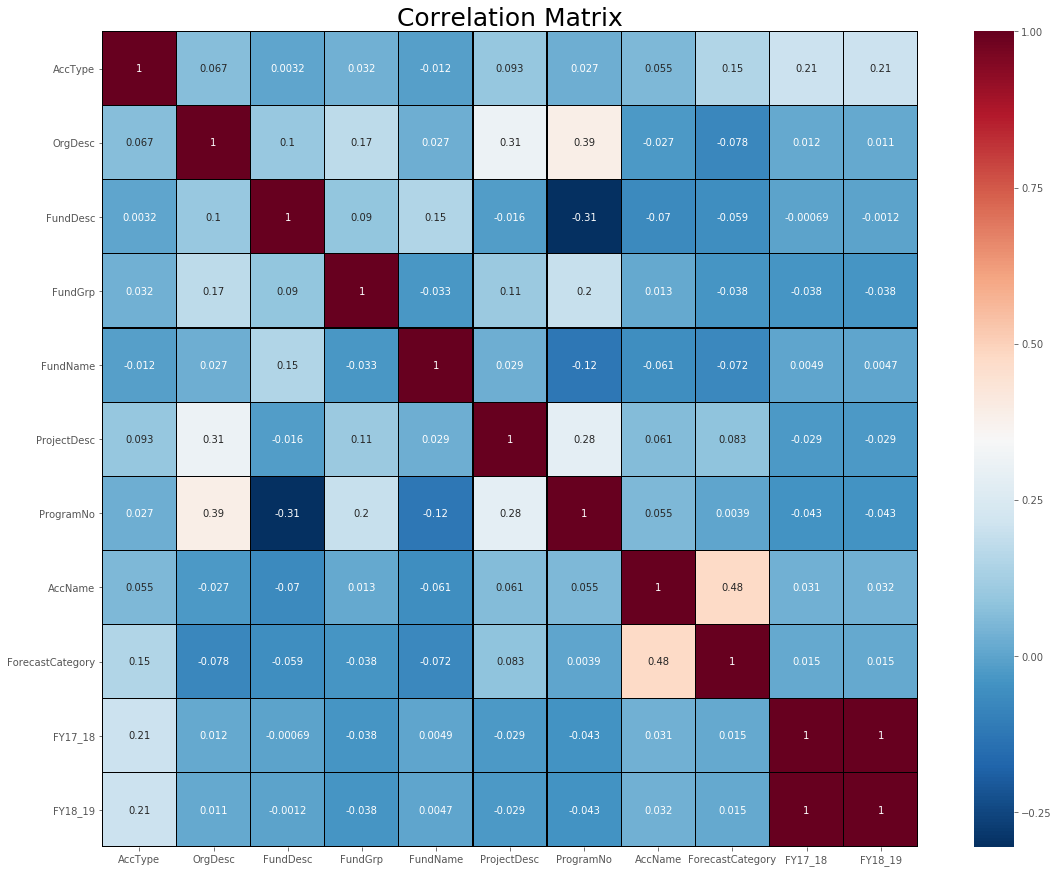

In [23]:
columns_drop=[ 'Department',  'OrgNum',   'FundGrpOrd', 'FundNum',  'ProgramDesc',  'ProgramName',   'FY15_16', 'FY16_17']
Output(columns_drop,oaklandAllPredictors,y)

#Is the relationship significant?  

Absolute t statistic values of model <2 are not significant


#Are any model assumptions violated?

Significant colinearity between AccName and Forecast category violates 'No or little multicollinearity' of linear regression


#Does the model make sense? 

Yes all parameters's significance are estimated aptly.


#Cross-validate the model. How well did it do? 

Cross validation score is high .It did Good


# Model 2

                            OLS Regression Results                            
Dep. Variable:                FY19_20   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.562e+06
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:36:06   Log-Likelihood:            -1.1442e+05
No. Observations:                9607   AIC:                         2.289e+05
Df Residuals:                    9597   BIC:                         2.289e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Department          87.4677     80.247  

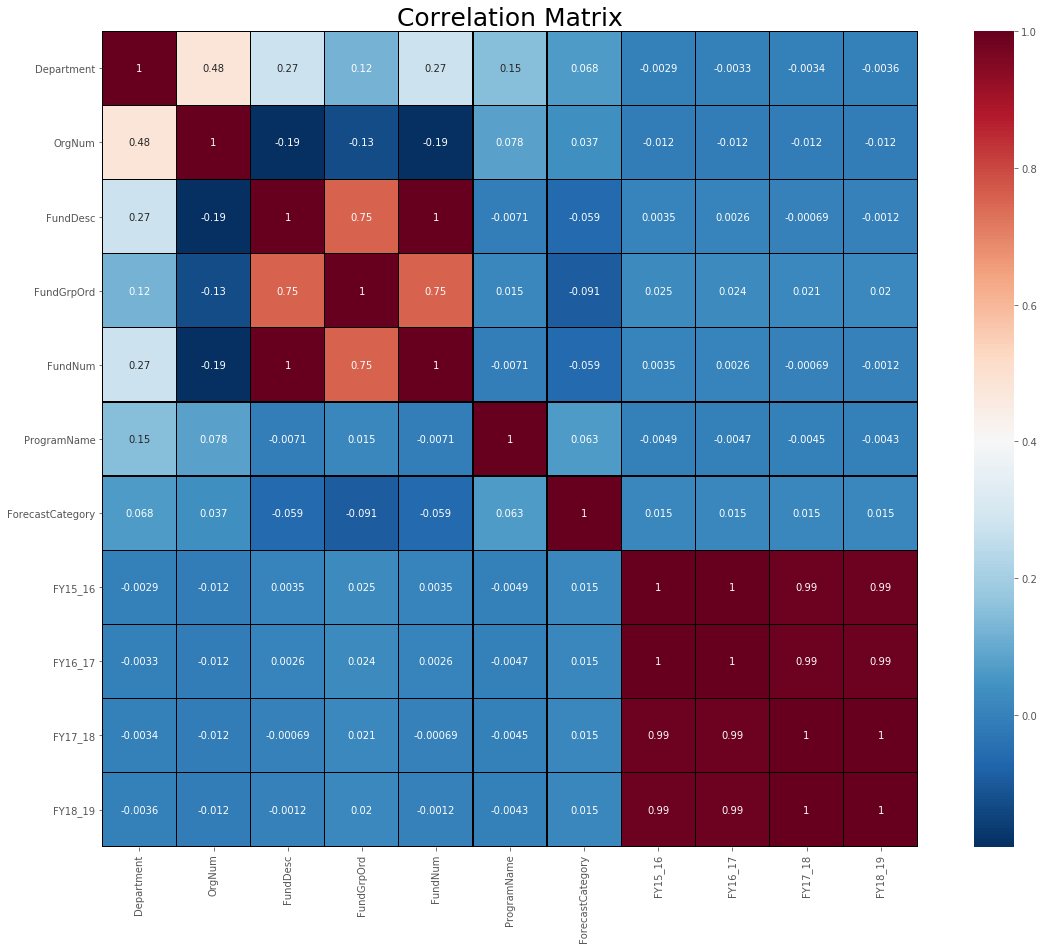

In [24]:
columns_drop=['AccType',  'OrgDesc',  'FundGrp', 'FundName', 'ProjectDesc', 'ProgramDesc', 'ProgramNo', 'AccName']
Output(columns_drop,oaklandAllPredictors,y)

#Is the relationship significant?  

Absolute t statistic values of model <2 are not significant


#Are any model assumptions violated?

Significant colinearity between FundGrpOrd and FundDesc, FundDesc and FundNum etc violates 'No or little multicollinearity' of linear regression


#Does the model make sense? 

No predictors like Forecast Category,Fund Description, Program name seem to have no significance on Financial forecast 19-20

#Cross-validate the model. How well did it do? 

Cross validation score is high .It did Good mathematically


# Model 3

                            OLS Regression Results                            
Dep. Variable:                FY19_20   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 6.914e+04
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:36:08   Log-Likelihood:            -1.3617e+05
No. Observations:                9607   AIC:                         2.723e+05
Df Residuals:                    9600   BIC:                         2.724e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OrgDesc      -109.7394     41.190     -2.664      

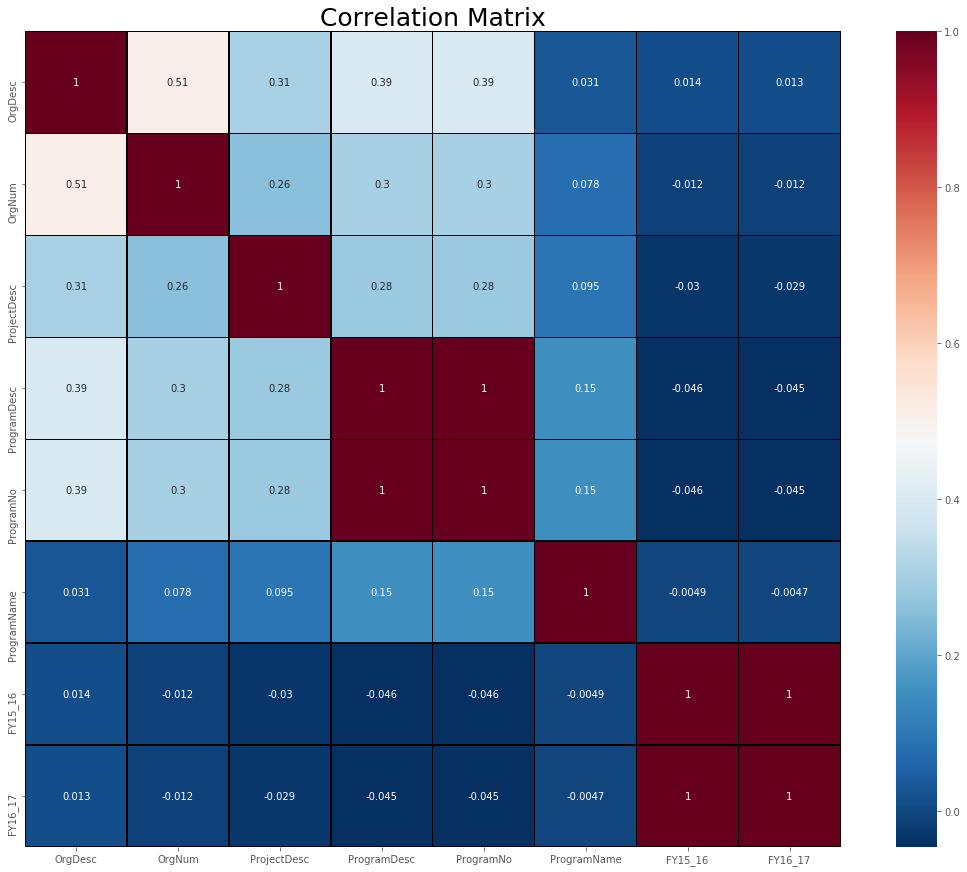

In [25]:
columns_drop=['AccType', 'Department', 'FundDesc', 'FundGrp', 'FundGrpOrd', 'FundNum', 'FundName',  'AccName', 'ForecastCategory', 'FY17_18', 'FY18_19']
Output(columns_drop,oaklandAllPredictors,y)

#Is the relationship significant?  

Absolute t statistic values of model <2 are not significant


#Are any model assumptions violated?

Significant colinearity between ProgramNum and ProgramDesc, FY15_16 and FY16_17 etc violates 'No or little multicollinearity' of linear regression


#Does the model make sense? 

Yes all parameters's significance are estimated aptly except ProjectDesc.

#Cross-validate the model. How well did it do? 

Cross validation score is high .It did Good mathematically


# Model 4

                            OLS Regression Results                            
Dep. Variable:                FY19_20   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     73.37
Date:                Tue, 11 Dec 2018   Prob (F-statistic):          6.84e-118
Time:                        22:36:09   Log-Likelihood:            -1.5481e+05
No. Observations:                9607   AIC:                         3.096e+05
Df Residuals:                    9599   BIC:                         3.097e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AccType      2.353e+06   1.11e+05     21.161      

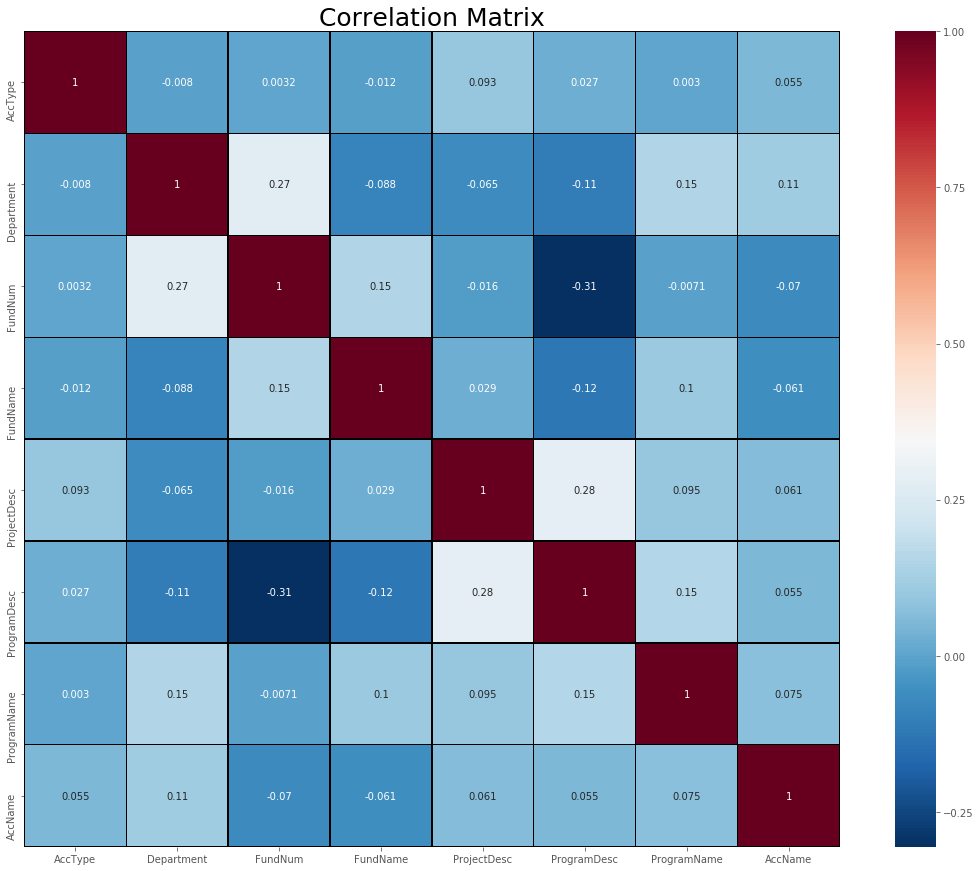

In [26]:
columns_drop=[ 'OrgDesc', 'OrgNum', 'FundDesc', 'FundGrp', 'FundGrpOrd', 'ProgramNo', 'ForecastCategory', 'FY15_16', 'FY16_17', 'FY17_18', 'FY18_19']
Output(columns_drop,oaklandAllPredictors,y)

#Is the relationship significant?  

Absolute t statistic values of model <2 are not significant


#Are any model assumptions violated?

No

#Does the model make sense? 

Yes all parameterss significance are estimated aptly .

#Cross-validate the model. How well did it do? 

Cross validation score is low .It did very bad mathematically

#Compare the AIC, BIC and adujested R^2.  Do they agree in their ranking of the models?  
                               
                               OLS Regression Results Model1                            
==============================================================================
Dep. Variable:                FY19_20   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.142e+06
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:19:42   Log-Likelihood:            -1.1443e+05
No. Observations:                9607   AIC:                         2.289e+05
Df Residuals:                    9596   BIC:                         2.290e+05
Df Model:                          11                                         
Covariance Type:            nonrobust

                            OLS Regression Results   Model2                          
==============================================================================
Dep. Variable:                FY19_20   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.562e+06
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:19:53   Log-Likelihood:            -1.1442e+05
No. Observations:                9607   AIC:                         2.289e+05
Df Residuals:                    9597   BIC:                         2.289e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         

                          OLS Regression Results Model 3 
==============================================================================
Dep. Variable:                FY19_20   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 6.914e+04
Date:                Wed, 28 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:20:02   Log-Likelihood:            -1.3617e+05
No. Observations:                9607   AIC:                         2.723e+05
Df Residuals:                    9600   BIC:                         2.724e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         

                            OLS Regression Results  Model4                          
==============================================================================
Dep. Variable:                FY19_20   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     73.37
Date:                Wed, 28 Nov 2018   Prob (F-statistic):          6.84e-118
Time:                        21:20:06   Log-Likelihood:            -1.5481e+05
No. Observations:                9607   AIC:                         3.096e+05
Df Residuals:                    9599   BIC:                         3.097e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         

R^2 value of 1 is ideal and desired .It indicates in order of preferance Model1 = Model2 > Model3 > Model4
AIC value of minimum is preffered as it suggest least complexity so order of preferance is Model1 = Model2 > Model3 > Model4
BIC is lower values are prefferd so the order of prefarance is Model3 > Model2 > Model1 > Model4



# Multi-colinearity and step-wise regression


We will do backward regression and start with fitted model of all predictors.
We remove the less significant parameters and generate the model that has most significant parameters.

                            OLS Regression Results                            
Dep. Variable:                FY19_20   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.692e+06
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:36:10   Log-Likelihood:            -1.1440e+05
No. Observations:                9607   AIC:                         2.288e+05
Df Residuals:                    9590   BIC:                         2.290e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
AccType          -4591.2732   1726.074  

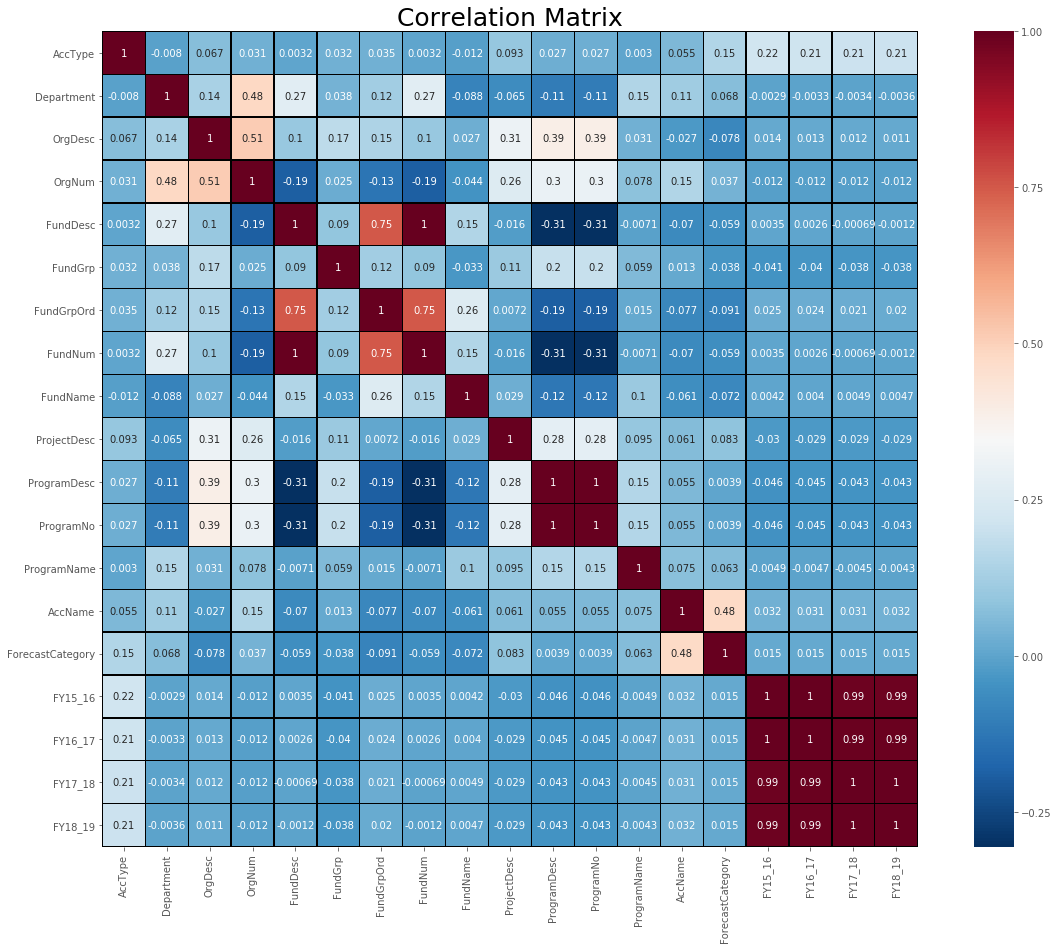

In [27]:
OaklandGivenPredictors=oaklandAllPredictors#Full model.Fitted with all predictors.
columns_drop=[]
Output(columns_drop,OaklandGivenPredictors,y)
OaklandGivenPredictors=OaklandGivenPredictors.drop(columns_drop,axis=1)#Remove columns from dataset of predictors

#Is there any multi-colinearity in the model?
Yes variables correlated significantly exhibit colinearity. eg FundNum&FundGrpOrd,FundGrpOr&FundDesc, FundNum&FundDesc etc

#In the multiple regression models are predictor variables independent of all the other predictor variables?  
No .department is predictor in some sense to FundDesc,ForecatCaregory etc

#Cross-validate the model. How well did they do? good cv score

The predictors having absolute t-statistic value greater than 2 are significant. Predictors showing near zero values of t- statistic are insignificant and they should be removed from linear model for better fitting linear model.FY17_18 seems to be most significant input for target but in inverse fasion. Colinearity exists.

                            OLS Regression Results                            
Dep. Variable:                FY19_20   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.162e+06
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:36:13   Log-Likelihood:            -1.1440e+05
No. Observations:                9607   AIC:                         2.288e+05
Df Residuals:                    9596   BIC:                         2.289e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
AccType          -4686.6258   1721.466  

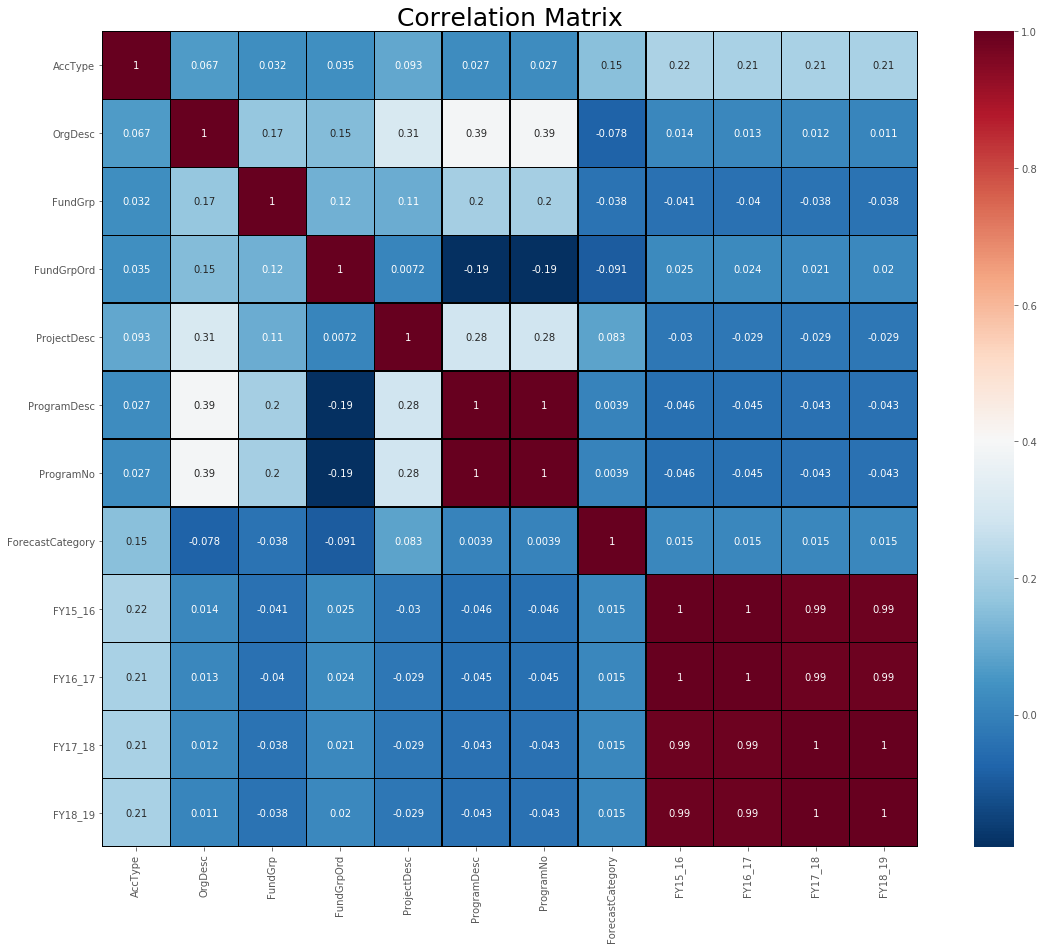

In [28]:
columns_drop=['Department',  'OrgNum', 'FundDesc', 'FundNum', 'FundName', 'ProgramName', 'AccName']
Output(columns_drop,OaklandGivenPredictors,y)
OaklandGivenPredictors=OaklandGivenPredictors.drop(columns_drop,axis=1)

#Is there any multi-colinearity in the model?
Yes variables correlated significantly exhibit colinearity. eg ProgramNum & ProgramDesc, FY17_18 & FY_18_19 etc

#In the multiple regression models are predictor variables independent of all the other predictor variables?  
No .ProgramDesc is predictor in some sense to ForecatCaregory etc

#Cross-validate the model. How well did they do? good cv score

                            OLS Regression Results                            
Dep. Variable:                FY19_20   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.722e+06
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:36:14   Log-Likelihood:            -1.1441e+05
No. Observations:                9607   AIC:                         2.288e+05
Df Residuals:                    9599   BIC:                         2.289e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AccType     -4687.3193   1694.207     -2.767      

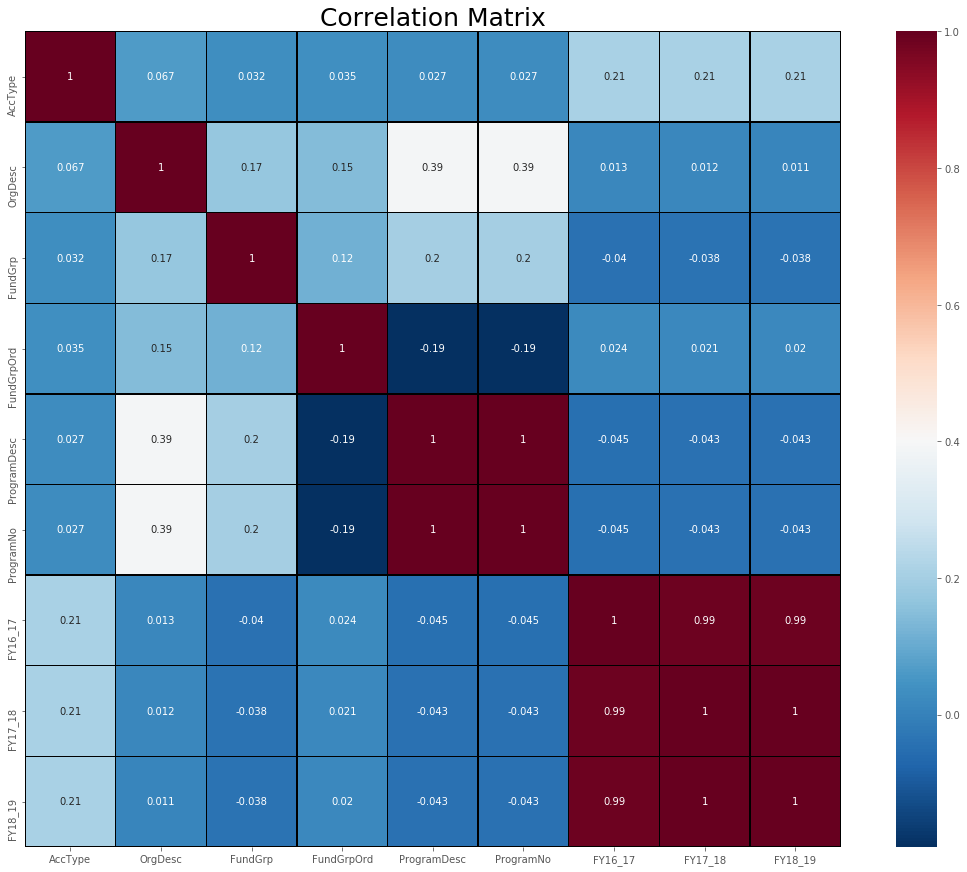

In [29]:
columns_drop=['ForecastCategory','FY15_16','ProjectDesc']
Output(columns_drop,OaklandGivenPredictors,y)
OaklandGivenPredictors=OaklandGivenPredictors.drop(columns_drop,axis=1)


#Is there any multi-colinearity in the model?
Yes variables correlated significantly exhibit colinearity. eg ProgramNum & ProgramDesc

#In the multiple regression models are predictor variables independent of all the other predictor variables?  
No .FY17_18 is predictor in some sense to FY18_19 etc

#Cross-validate the model. How well did they do? good cv score

                            OLS Regression Results                            
Dep. Variable:                FY19_20   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.538e+06
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:36:16   Log-Likelihood:            -1.1441e+05
No. Observations:                9607   AIC:                         2.288e+05
Df Residuals:                    9600   BIC:                         2.289e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AccType     -4575.7741   1693.279     -2.702      

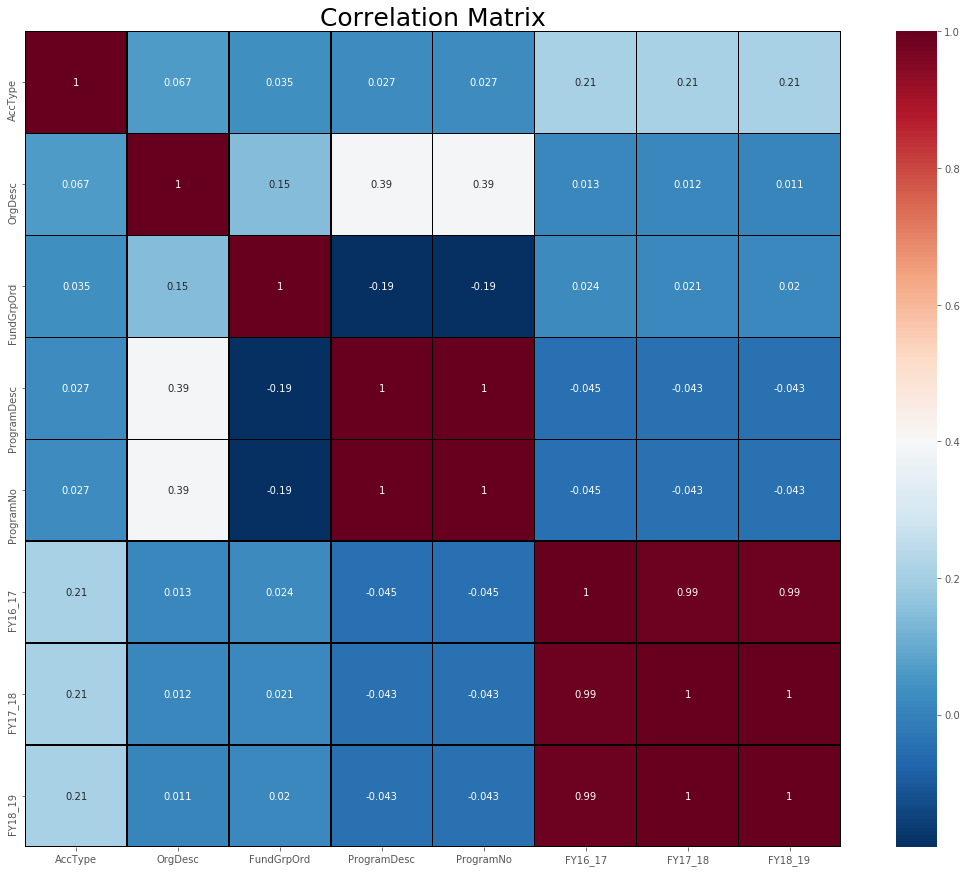

In [30]:
columns_drop=['FundGrp']
Output(columns_drop,OaklandGivenPredictors,y)
OaklandGivenPredictors=OaklandGivenPredictors.drop(columns_drop,axis=1)

#Is there any multi-colinearity in the model?
Yes variables correlated significantly exhibit colinearity. eg ProgramNum & ProgramDesc ETC

#In the multiple regression models are predictor variables independent of all the other predictor variables?  
No .FY17_18 is predictor in some sense to FY18_19 etc

#Cross-validate the model. How well did they do?
good cv score

                            OLS Regression Results                            
Dep. Variable:                FY19_20   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.627e+06
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:36:17   Log-Likelihood:            -1.1441e+05
No. Observations:                9607   AIC:                         2.288e+05
Df Residuals:                    9601   BIC:                         2.289e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AccType     -4674.3652   1692.122     -2.762      

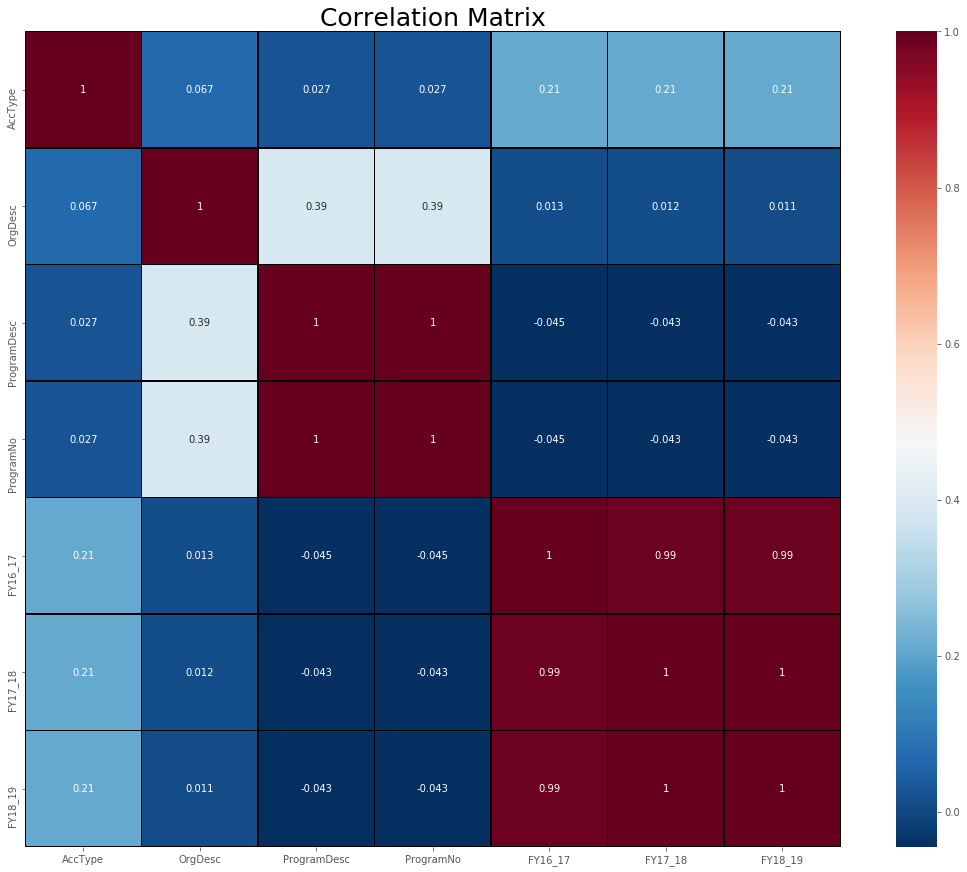

In [31]:
columns_drop=['FundGrpOrd']
Output(columns_drop,OaklandGivenPredictors,y)
OaklandGivenPredictors=OaklandGivenPredictors.drop(columns_drop,axis=1)

#Is there any multi-colinearity in the model?
Yes variables correlated significantly exhibit colinearity. eg ProgramNum & ProgramDesc

#In the multiple regression models are predictor variables independent of all the other predictor variables?  
No .FY17_18 is predictor in some sense to FY18_19 etc

#Cross-validate the model. How well did they do? 
good cv score

### In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 

### 'AccType', 'OrgDesc', 'ProgramDesc', 'ProgramNo', 'FY15_16','FY16_17', 'FY17_18', 'FY18_19 are most significant

# Interaction effects


In [32]:
list(OaklandGivenPredictors)

['AccType',
 'OrgDesc',
 'ProgramDesc',
 'ProgramNo',
 'FY16_17',
 'FY17_18',
 'FY18_19']

                            OLS Regression Results                            
Dep. Variable:                FY19_20   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     14.41
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           9.67e-26
Time:                        22:36:18   Log-Likelihood:            -1.5502e+05
No. Observations:                9607   AIC:                         3.101e+05
Df Residuals:                    9597   BIC:                         3.101e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Department        8726.9296   5943.776  

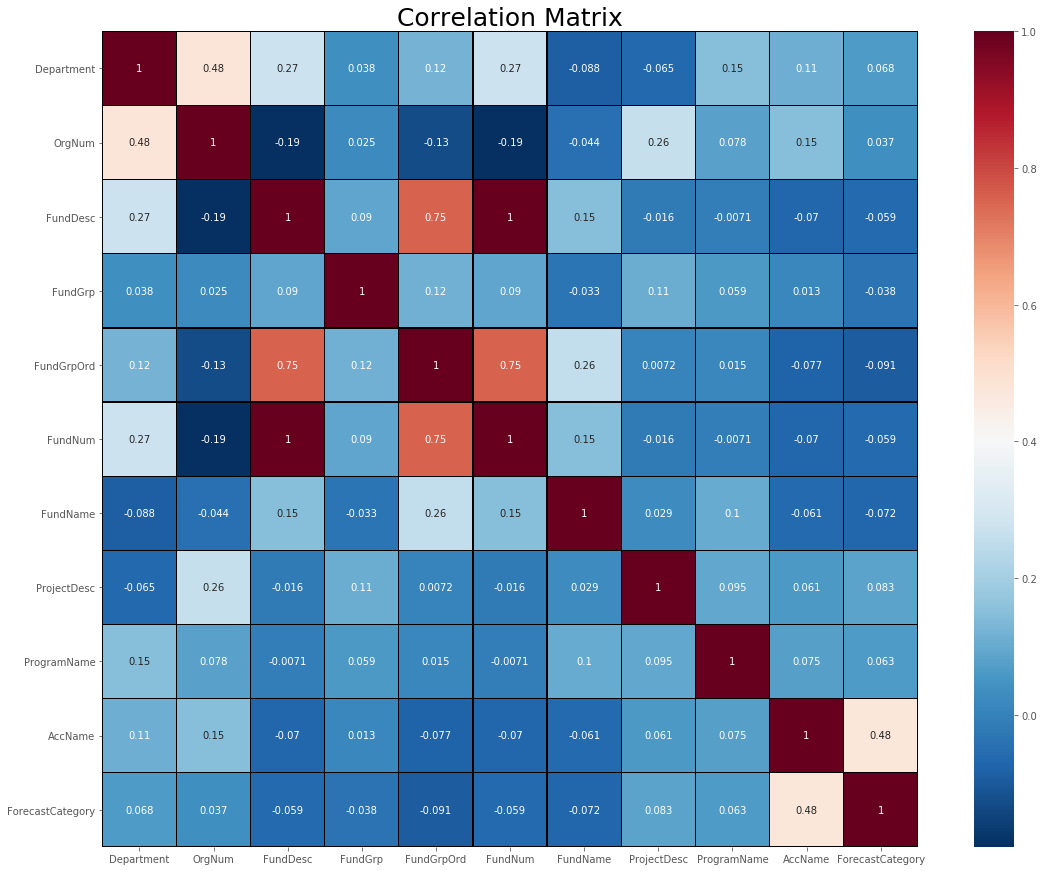

In [33]:
#Generating model of least significance
columns_drop=[ 'AccType', 'OrgDesc', 'ProgramDesc', 'ProgramNo', 'FY15_16','FY16_17', 'FY17_18', 'FY18_19']
Output(columns_drop,oaklandAllPredictors,y)
result=oaklandAllPredictors.drop(columns_drop,axis=1)
print(list(result))

In [34]:
mergeData = pd.concat([result, y], axis=1, join_axes=[result.index])
formula = 'FY19_20 ~ Department + OrgNum + FundDesc + FundGrp + FundGrpOrd + FundNum + FundName + ProjectDesc + ProgramName + AccName + ForecastCategory + Department*ProjectDesc + ProgramName*AccName + ProjectDesc*ForecastCategory + Department*OrgNum + FundDesc*FundGrp + FundGrpOrd*FundNum + FundName*ProjectDesc +ProgramName*AccName+ FundName*AccName + FundGrpOrd*ForecastCategory'

In [35]:
lm = smf.ols(formula, data = mergeData).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FY19_20   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.996
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           1.23e-05
Time:                        22:36:19   Log-Likelihood:            -1.5501e+05
No. Observations:                9607   AIC:                         3.101e+05
Df Residuals:                    9587   BIC:                         3.102e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1.023e+05   2.82e+05     -0.363      0.717   -6.55e+05    4.51e+05
Department                    1.301e+04   9343.106      1.392      0.164   -5306.115    3.13e+04
OrgNum                         513.1879    856.083      0.599      0.549   -1164.916    2191.292
FundDesc                      1493.4073   2037.126      0.733      0.464   -2499.789    5486.604
FundGrp                        5.48e+04   4.99e+04      1.099      0.272   -4.29e+04    1.53e+05
FundGrpOrd                    1.372e+04   4.93e+04      0.278      0.781   -8.29e+04     1.1e+05
FundNum                       1493.4073   2037.126      0.733      0.464   -2499.789    5486.604
FundName                      -799.2032   1646.188     -0.485      0.627   -4026.079    2427.673
ProjectDesc                   -613.9104   1086.741     -0.565      0.572   -2744.153    1516.332
ProgramName                    -20.6872    945.627     -0.022      0.983   -1874.315    1832.941
AccName                        330.9470    593.819      0.557      0.577    -833.065    1494.959
ForecastCategory              1696.6183   2322.519      0.731      0.465   -2856.011    6249.248
Department:ProjectDesc          44.4914     69.406      0.641      0.522     -91.558     180.541
ProgramName:AccName             -2.4440      5.056     -0.483      0.629     -12.355       7.467
ProjectDesc:ForecastCategory   -21.9910     19.390     -1.134      0.257     -60.000      16.018
Department:OrgNum              -73.0238     60.061     -1.216      0.224    -190.757      44.709
FundDesc:FundGrp             -1592.3672    856.947     -1.858      0.063   -3272.165      87.431
FundGrpOrd:FundNum             659.5735    603.942      1.092      0.275    -524.281    1843.428
FundName:ProjectDesc            -2.2303     12.426     -0.179      0.858     -26.587      22.126
FundName:AccName                13.1520      8.720      1.508      0.132      -3.941      30.245
FundGrpOrd:ForecastCategory   -336.0283    669.124     -0.502      0.616   -1647.653     975.596
==============================================================================
Omnibus:                    22657.883   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        219033912.305
Skew:                          23.723   Prob(JB):                         0.00
Kurtosis:                     741.197   Cond. No.                     3.05e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.58e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Is there a significant synergy (interaction effect) in either of your tested product terms?
## No. all computed product terms give poor t statistic values(<2) not significant

# ASSIGNMENT 4

In [36]:
import h2o
from h2o.automl import H2OAutoML


In [37]:
h2o.init(strict_version_check=False) # start h2o


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 50 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,19 days
H2O cluster name:,H2O_from_python_Suprita_Ganesh_312hj0
H2O cluster total nodes:,1
H2O cluster free memory:,3.041 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [38]:
hf = h2o.H2OFrame(oaklandData)
df= h2o.H2OFrame(oaklandAllPredictors)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [39]:
hf.describe()
df.describe()

Rows:9607
Cols:20




,AccType,Department,OrgDesc,OrgNum,FundDesc,FundGrp,FundGrpOrd,FundNum,FundName,ProjectDesc,ProgramDesc,ProgramNo,ProgramName,AccName,ForecastCategory,FY15_16,FY16_17,FY17_18,FY18_19,FY19_20
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-361708.0,-366914.0,-15482681.25,-15857396.25,-16226433.75
mean,0.052149474341625895,12.83095659415011,162.1097116685743,159.44228166961636,29.160507962943747,5.556573331945458,2.006661809097529,29.160507962943747,48.41292807327992,40.851462475278396,83.0507962943691,83.0507962943691,74.47496617050082,143.24388466743022,19.35921723743108,249032.44744020194,253123.76165421508,259665.4579225429,265806.30145337834,271506.3328457165
maxs,1.0,19.0,353.0,353.0,111.0,10.0,10.0,111.0,111.0,338.0,148.0,148.0,148.0,358.0,46.0,95086289.0,99050414.0,103012431.0,106617866.0,109816402.0
sigma,0.2223399478277495,5.543268313978664,104.13329094152972,99.95578334602091,33.94402456603288,1.9663259883264663,2.452326493455477,33.94402456603288,26.700584004256598,84.28022090469096,40.77167781420295,40.77167781420295,43.14600968954528,115.61082723858124,15.99472033607839,2184022.8831983176,2259502.55323186,2344040.7785657886,2407593.508019485,2467725.111200014
zeros,9106,28,20,20,3812,120,3812,3812,11,6691,7,7,1,18,1,22,23,5,4,5
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,1.0,10.0,10.0,0.0,5.0,0.0,0.0,34.0,0.0,36.0,36.0,98.0,42.0,5.0,95863.0,95863.0,98499.23,101207.96,103991.0
1,0.0,15.0,342.0,240.0,0.0,5.0,0.0,0.0,34.0,0.0,63.0,63.0,60.0,57.0,6.0,34960.0,35460.0,0.0,0.0,0.0
2,0.0,1.0,10.0,10.0,0.0,5.0,0.0,0.0,34.0,0.0,37.0,37.0,4.0,42.0,5.0,1442819.0,1442819.0,1482497.0,1523265.0,1565155.0


Rows:9607
Cols:19




,AccType,Department,OrgDesc,OrgNum,FundDesc,FundGrp,FundGrpOrd,FundNum,FundName,ProjectDesc,ProgramDesc,ProgramNo,ProgramName,AccName,ForecastCategory,FY15_16,FY16_17,FY17_18,FY18_19
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-361708.0,-366914.0,-15482681.25,-15857396.25
mean,0.052149474341625895,12.83095659415011,162.1097116685743,159.44228166961636,29.160507962943747,5.556573331945458,2.006661809097529,29.160507962943747,48.41292807327992,40.851462475278396,83.0507962943691,83.0507962943691,74.47496617050082,143.24388466743022,19.35921723743108,249032.44744020194,253123.76165421508,259665.4579225429,265806.30145337834
maxs,1.0,19.0,353.0,353.0,111.0,10.0,10.0,111.0,111.0,338.0,148.0,148.0,148.0,358.0,46.0,95086289.0,99050414.0,103012431.0,106617866.0
sigma,0.2223399478277495,5.543268313978664,104.13329094152972,99.95578334602091,33.94402456603288,1.9663259883264663,2.452326493455477,33.94402456603288,26.700584004256598,84.28022090469096,40.77167781420295,40.77167781420295,43.14600968954528,115.61082723858124,15.99472033607839,2184022.8831983176,2259502.55323186,2344040.7785657886,2407593.508019485
zeros,9106,28,20,20,3812,120,3812,3812,11,6691,7,7,1,18,1,22,23,5,4
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,1.0,10.0,10.0,0.0,5.0,0.0,0.0,34.0,0.0,36.0,36.0,98.0,42.0,5.0,95863.0,95863.0,98499.23,101207.96
1,0.0,15.0,342.0,240.0,0.0,5.0,0.0,0.0,34.0,0.0,63.0,63.0,60.0,57.0,6.0,34960.0,35460.0,0.0,0.0
2,0.0,1.0,10.0,10.0,0.0,5.0,0.0,0.0,34.0,0.0,37.0,37.0,4.0,42.0,5.0,1442819.0,1442819.0,1482497.0,1523265.0


In [40]:
# assign target and inputs for logistic regression
target = oaklandData.filter(['AccType'], axis=1)


In [41]:
y = h2o.H2OFrame(target)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [42]:
y.describe()


Rows:9607
Cols:1




,AccType
type,int
mins,0.0
mean,0.052149474341625895
maxs,1.0
sigma,0.2223399478277495
zeros,9106
missing,0
0,0.0
1,0.0
2,0.0


In [43]:
run_time=333
run_id='SOME_ID_20180617_221529' # Just some arbitrary ID
classification=True
scale=False
max_models=None
balance_y=False # balance_classes=balance_y
balance_threshold=0.2
project ="automl_test"  # project_name = project


In [44]:
# set target to factor for classification by default or if user specifies classification
if classification:
    y= y.asfactor()


In [45]:
y.levels()


[['0', '1']]

In [46]:
if classification:
    class_percentage = y_balance=df[y].mean()[0]/(df[y].max()-df[y].min())
    if class_percentage < balance_threshold:
        balance_y=True


In [47]:
print(run_time)
type(run_time)


333


int

In [48]:
# automl
# runs for run_time seconds then builds a stacked ensemble
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project,balance_classes=balance_y) # init automl, run for 300 seconds
aml.train(x=X,  
           y=y,
           training_frame=df)


NameError: name 'X' is not defined

In [49]:
oaklandData.head()

,AccType,Department,OrgDesc,OrgNum,FundDesc,FundGrp,FundGrpOrd,FundNum,FundName,ProjectDesc,ProgramDesc,ProgramNo,ProgramName,AccName,ForecastCategory,FY15_16,FY16_17,FY17_18,FY18_19,FY19_20
0,0,1,10,10,0,5,0,0,34,0,36,36,98,42,5,95863.0,95863.0,98499.23,101207.96,103991.0
1,0,15,342,240,0,5,0,0,34,0,63,63,60,57,6,34960.0,35460.0,0.00,0.00,0.0
2,0,1,10,10,0,5,0,0,34,0,37,37,4,42,5,1442819.0,1442819.0,1482497.00,1523265.00,1565155.0
3,0,1,10,10,0,5,0,0,34,0,63,63,60,42,5,57636.0,57636.0,59221.00,60850.00,62523.0
4,0,1,10,10,0,5,0,0,34,10,37,37,4,42,5,44932.0,44932.0,46168.00,47437.00,48742.0


In [50]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score


C:\Users\Suprita Ganesh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [52]:
y = ['AccType']
X = oaklandData.drop(['AccType'], axis = 1)

In [53]:
# Split the dataset to trainand test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)


ValueError: Found input variables with inconsistent numbers of samples: [9607, 1]